In [15]:
# Visualizations

In [16]:
import pandas as pd
from plotnine import *

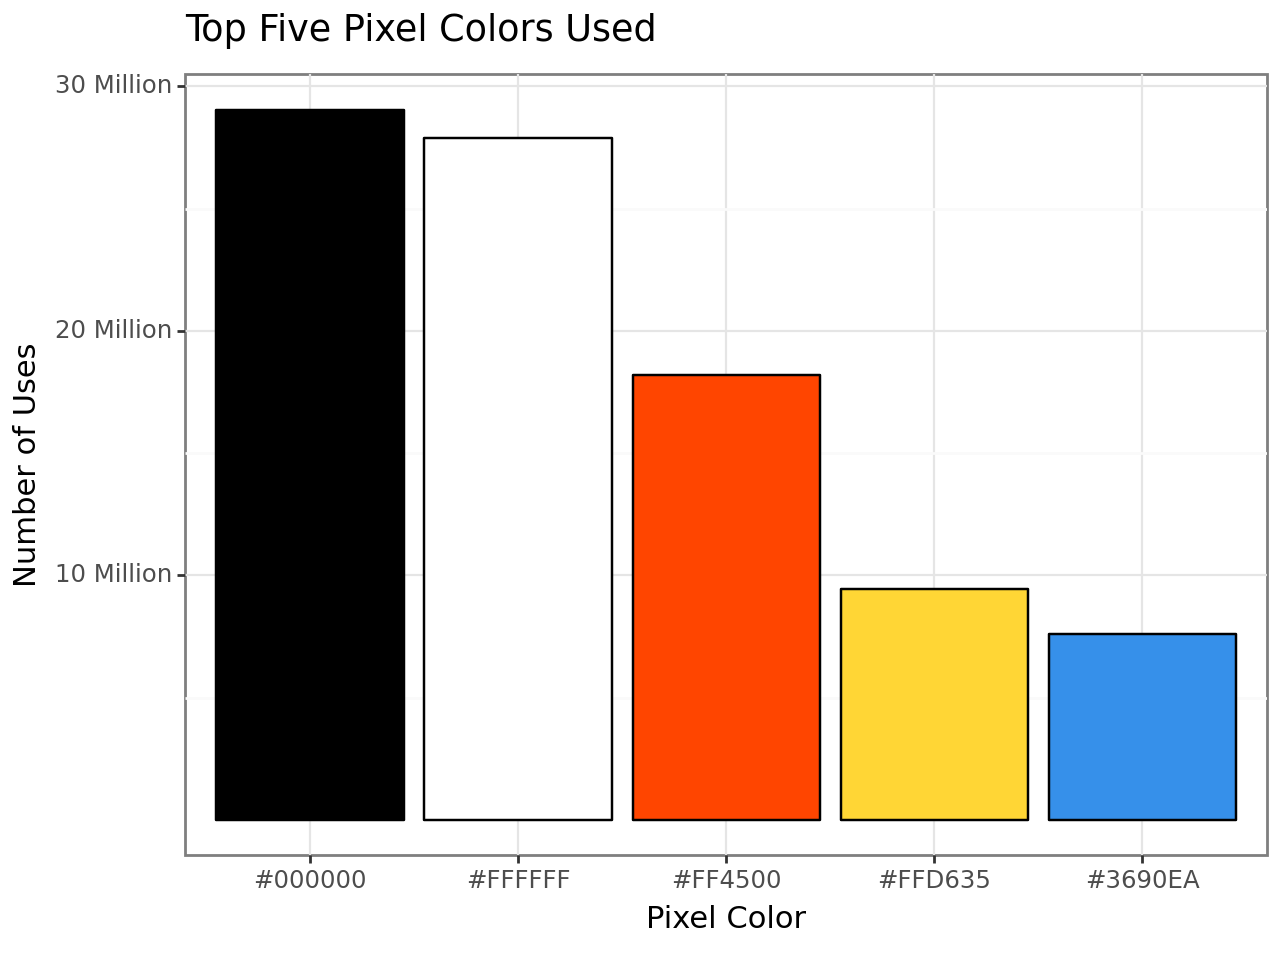

<Figure Size: (640 x 480)>

In [17]:
pixels = pd.read_csv('pixel_counts.csv')
top_pixels = pixels.sort_values(by = 'pixel_count', ascending = False).head()

pixels_list = top_pixels['pixel_color'].value_counts().index.tolist() # orders from greatest to least

(ggplot(top_pixels, mapping = aes(
  x = "pixel_color",
    y = 'pixel_count',
    fill = 'pixel_color'
))
+ geom_bar(stat = 'identity',colour = 'black')
 + labs(x = "Pixel Color", y = "Number of Uses", title = "Top Five Pixel Colors Used")
 + scale_x_discrete(limits=pixels_list)
 + scale_y_continuous(breaks = [10000000, 20000000, 30000000],labels = ["10 Million", '20 Million', '30 Million'])
 + scale_fill_manual(values=['#000000', '#3690EA', '#FF4500', '#FFD635', '#FFFFFF'])
 + theme_bw()
 + guides(fill = False)
)

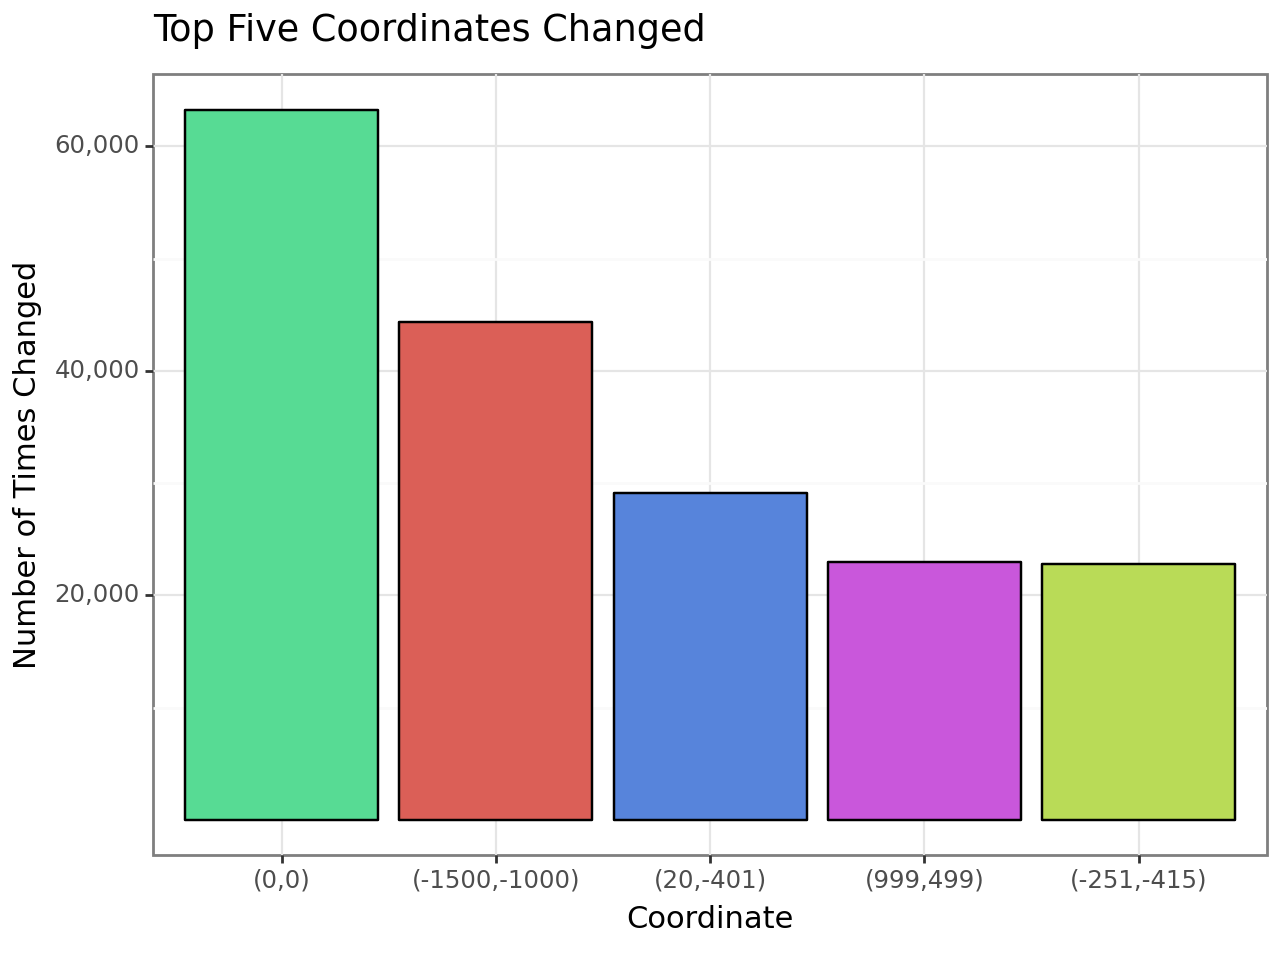

<Figure Size: (640 x 480)>

In [18]:
coords = pd.read_csv("cord_counts.csv")
top_coords = coords.sort_values(by = 'coordinate_count', ascending = False).head()
coords_list = top_coords['coordinate'].value_counts().index.tolist() # orders from greatest to least

(ggplot(top_coords, mapping = aes(
  x = "coordinate",
    y = 'coordinate_count',
    fill = 'coordinate'
))
 + geom_bar(stat = 'identity',colour = 'black')
  + labs(x = "Coordinate", y = "Number of Times Changed", title = "Top Five Coordinates Changed")
  + scale_x_discrete(limits=coords_list, labels = ['(0,0)', '(-1500,-1000)', '(20,-401)','(999,499)','(-251,-415)'])
  + scale_y_continuous(breaks = [20000, 40000, 60000],labels = ["20,000", '40,000', '60,000'])
#  + scale_fill_manual(values=['red', 'red', 'red', '#red', '#FFFFFF'])
  + theme_bw()
  + guides(fill = False)
)

In [1]:
import pandas as pd
from plotnine import *

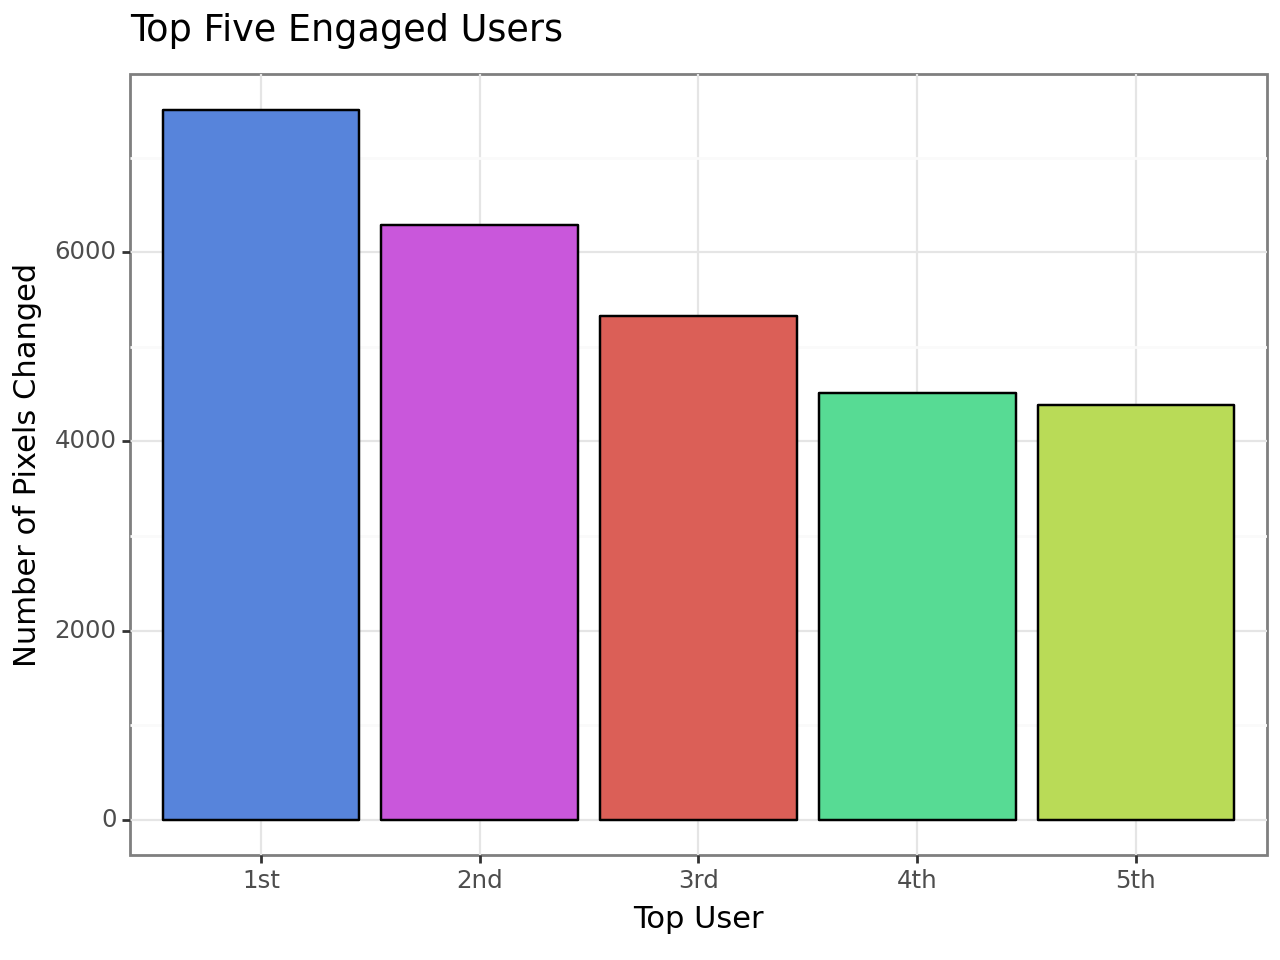

<Figure Size: (640 x 480)>

In [2]:
users = pd.read_csv("user_counts.csv")
top_users = users.sort_values(by = 'user_count', ascending = False).head()
user_list = top_users['user'].value_counts().index.tolist() # orders from greatest to least

(ggplot(top_users, mapping = aes(
  x = "user",
    y = 'user_count',
    fill = 'user'
))
  + geom_bar(stat = 'identity',colour = 'black')
   + labs(x = "Top User", y = "Number of Pixels Changed", title = "Top Five Engaged Users")
   + scale_x_discrete(limits=user_list, labels = ['1st', '2nd', '3rd','4th','5th'])
#   + scale_y_continuous(breaks = [20000, 40000, 60000],labels = ["20,000", '40,000', '60,000'])
# #  + scale_fill_manual(values=['red', 'red', 'red', '#red', '#FFFFFF'])
   + theme_bw()
   + guides(fill = False)
)

In [ ]:
import pandas as pd
users = pd.read_csv("user_counts.csv")

users1 = len(users[users['user_count'] == 1])
users2 = len(users[users['user_count'] == 2])
users3 = len(users[users['user_count'] == 3])
users4 = len(users[users['user_count'] == 4])
users5 = len(users[users['user_count'] == 5])
users6 = len(users[users['user_count'] == 6])
users7 = len(users[users['user_count'] == 7])
users8 = len(users[users['user_count'] == 8])
users9 = len(users[users['user_count'] >= 9])

userfreq = pd.DataFrame({'Number Pixels Changed': ['1', '2', '3','4','5','6','7','8','9+'],
             'Occurances': [users1, users2, users3, users4, users5, users6, users7, users8, users9]})
from plotnine import *


(ggplot(userfreq, mapping = aes(
  x = "Number Pixels Changed",
    y = 'Occurances',
    fill = 'Number Pixels Changed'
))
  + geom_bar(stat = 'identity',colour = 'black')
   + labs(x = "Number of Pixels Changed", y = "Number of Users", title = "User Interaction")
   + scale_y_continuous(breaks = [1000000, 2000000, 3000000],labels = ["1 million", '2 million', '3 million'])
   + theme_bw()
   + guides(fill = False)
)

In [ ]:
len(users)

In [ ]:
# Begin Bot Analysis

In [1]:
import pandas as pd
users = pd.read_csv("user_counts.csv")
users.sort_values(by = 'user_count', ascending = False).head().iloc[2]['user']
#users.sort_values(by = 'user_count', ascending = False).head().iloc[1]["user"]

'/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw=='

In [33]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

# This is the built-in SageMaker role used for the notebook instance.
role = get_execution_role()
bucket = 'csv-output-gsb521'  # replace with your bucket name
file_key = 'combined/part-00000-7359b9cd-b1aa-498f-b365-dbbe39a19a8a-c000.csv'  # replace with your file path
s3_client = boto3.client('s3')
obj = s3_client.get_object(Bucket=bucket, Key=file_key)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [34]:
test_user = 'ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ=='


def new_parser(obj_val, chunk_size):
    chunk_iterator = pd.read_csv(obj_val['Body'], chunksize=chunk_size)
    def readChunks(cb):
        for chunk in chunk_iterator:
          cb(chunk)

    def getRowsByColumnValue(column, value):
        res = []  # result array
        def cb(chunk):
            # Filter rows where the value in the specified column matches the given value
            filtered_chunk = chunk[chunk[column] == value]
            if not filtered_chunk.empty:
                res.append(filtered_chunk)

        readChunks(cb=cb)
        # so if res is empty, we dont error if caller doesn't None check
        return pd.concat(res) if res else pd.DataFrame()

    return {
     'getRowsByColumnValue': getRowsByColumnValue
  }

parser = new_parser(obj, 10000)

user5 = parser['getRowsByColumnValue']('user', test_user)
user5.head()


,timestamp,user,coordinate,pixel_color
961884,2023-07-20 14:30:27.517 UTC,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,"362,180",#000000
1142020,2023-07-20 14:42:40.663 UTC,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,"200,-305",#FFFFFF
1143285,2023-07-20 14:42:45.61 UTC,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,"201,-305",#FFFFFF
1153069,2023-07-20 14:43:25.566 UTC,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,"200,-307",#FFFFFF
1170769,2023-07-20 14:44:38.373 UTC,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,"197,-307",#FFFFFF


In [3]:
# Investigate top user ('kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==')
user1.head()

,timestamp,user,coordinate,pixel_color
13392307,2023-07-21 07:05:44.43 UTC,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,"287,-360",#FFD635
13399708,2023-07-21 07:06:34.175 UTC,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,"281,-369",#FFD635
13402147,2023-07-21 07:06:50.495 UTC,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,"282,-367",#FFD635
13402983,2023-07-21 07:06:56.105 UTC,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,"281,-367",#FFD635
13405965,2023-07-21 07:07:16.325 UTC,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,"-314,116",#FFFFFF


In [27]:
user1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7504 entries, 13392307 to 129175887
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    7504 non-null   object
 1   user         7504 non-null   object
 2   coordinate   7504 non-null   object
 3   pixel_color  7504 non-null   object
dtypes: object(4)
memory usage: 293.1+ KB


In [3]:
user1['timestamp'].value_counts() # sus

timestamp
2023-07-23 10:45:41.471 UTC    45
2023-07-23 09:04:26.838 UTC    37
2023-07-23 09:05:19.298 UTC    35
2023-07-23 09:04:57.346 UTC    32
2023-07-23 09:03:41.514 UTC    31
                               ..
2023-07-24 08:21:18.09 UTC      1
2023-07-24 08:21:16.961 UTC     1
2023-07-24 08:21:16.448 UTC     1
2023-07-24 08:21:14.554 UTC     1
2023-07-24 08:28:01.684 UTC     1
Name: count, Length: 5929, dtype: int64

In [4]:
user1['coordinate'].value_counts()

coordinate
-268,771                   49
-266,767                   45
-269,772                   43
-265,771                   42
-270,768                   38
                           ..
{X: 816, Y: -751, R: 2}     1
{X: 815, Y: -763, R: 2}     1
{X: 800, Y: -748, R: 2}     1
{X: 805, Y: -758, R: 2}     1
866,28,870,30               1
Name: count, Length: 4149, dtype: int64

In [23]:
user1['timestamp'] = user1['timestamp'].apply(lambda x: x[0:11])

In [26]:
user1['timestamp'].unique()

array(['2023-07-21 ', '2023-07-22 ', '2023-07-23 ', '2023-07-24 ',
       '2023-07-25 '], dtype=object)

In [ ]:
# Investiage User 2 ('oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==')

In [9]:
user2.head()

,timestamp,user,coordinate,pixel_color
405708,2023-07-20 13:48:10.991 UTC,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"-313,-210",#3690EA
408144,2023-07-20 13:48:23.554 UTC,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"-312,-210",#3690EA
5469570,2023-07-20 19:14:37.241 UTC,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"279,-377",#FFD635
5471448,2023-07-20 19:14:41.852 UTC,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"283,-377",#FFD635
5481164,2023-07-20 19:15:05.04 UTC,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"283,-375",#FFD635


In [10]:
user2['timestamp'].value_counts()

timestamp
2023-07-23 14:30:13.043 UTC    5
2023-07-23 14:22:16.081 UTC    5
2023-07-23 14:44:29.786 UTC    5
2023-07-23 14:44:00.417 UTC    5
2023-07-23 14:43:38.777 UTC    5
                              ..
2023-07-23 14:01:29.385 UTC    1
2023-07-23 13:59:52.502 UTC    1
2023-07-23 13:59:01.968 UTC    1
2023-07-23 13:57:02.851 UTC    1
2023-07-23 14:41:00.531 UTC    1
Name: count, Length: 5638, dtype: int64

In [11]:
user2['coordinate'].value_counts()

coordinate
{X: -267, Y: 769, R: 3}    197
-1382,-724                  84
-1388,-724                  73
-1389,-724                  55
-1381,-724                  52
                          ... 
{X: -955, Y: 223, R: 5}      1
{X: 85, Y: -705, R: 4}       1
83,-702,87,-688              1
79,-709,89,-703              1
{X: -921, Y: 226, R: 5}      1
Name: count, Length: 1988, dtype: int64

In [ ]:
# Investigate User 3 ('/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==')

In [4]:
user3.head()

,timestamp,user,coordinate,pixel_color
5604852,2023-07-20 19:19:50.976 UTC,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"277,-335",#000000
5618874,2023-07-20 19:20:26.825 UTC,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"281,-368",#000000
5620737,2023-07-20 19:20:30.843 UTC,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"281,-366",#FFD635
5624238,2023-07-20 19:20:38.284 UTC,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"285,-364",#000000
5626392,2023-07-20 19:20:43.285 UTC,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"277,-364",#000000


In [5]:
user3['timestamp'].value_counts()

timestamp
2023-07-24 00:29:45.204 UTC    16
2023-07-24 00:28:08.216 UTC    13
2023-07-25 18:08:28.249 UTC    13
2023-07-24 00:30:23.694 UTC    12
2023-07-25 18:20:37.007 UTC    11
                               ..
2023-07-23 23:04:57.948 UTC     1
2023-07-23 23:04:55.859 UTC     1
2023-07-23 23:04:52.856 UTC     1
2023-07-23 23:04:50.232 UTC     1
2023-07-23 23:07:04.74 UTC      1
Name: count, Length: 4747, dtype: int64

In [6]:
user3['coordinate'].value_counts()

coordinate
-1387,247    100
-1377,247     93
-269,768      87
-265,767      85
-268,772      85
            ... 
-362,482       1
-363,482       1
-362,481       1
-363,481       1
-362,479       1
Name: count, Length: 1697, dtype: int64

In [ ]:
# Investigate User 4 ('bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebVE7a+ipl2x8FUkL3oRtUjW+0JImeTYb2XQAEq5rjw==')

In [30]:
user4.head()

,timestamp,user,coordinate,pixel_color
7368418,2023-07-20 20:43:30.973 UTC,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,"-500,-451",#3690EA
8578695,2023-07-20 22:08:19.69 UTC,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,"191,-252",#FFFFFF
8580844,2023-07-20 22:08:26.339 UTC,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,"190,-253",#FFFFFF
8582301,2023-07-20 22:08:30.751 UTC,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,"191,-255",#FFFFFF
8583990,2023-07-20 22:08:35.821 UTC,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,"192,-254",#FFFFFF


In [31]:
user4['timestamp'].value_counts()

timestamp
2023-07-24 02:30:28.717 UTC    9
2023-07-24 02:28:49.377 UTC    8
2023-07-24 02:29:25.452 UTC    8
2023-07-24 02:31:03.533 UTC    8
2023-07-21 06:40:59.232 UTC    8
                              ..
2023-07-21 06:46:53.586 UTC    1
2023-07-21 06:46:51.524 UTC    1
2023-07-21 06:40:22.89 UTC     1
2023-07-21 06:40:18.7 UTC      1
2023-07-21 06:47:07.272 UTC    1
Name: count, Length: 4322, dtype: int64

In [32]:
user4['coordinate'].value_counts()

coordinate
281,-366    37
281,-367    36
281,-365    21
423,333     17
288,-367    15
            ..
612,-872     1
612,-869     1
612,-871     1
606,-868     1
109,-849     1
Name: count, Length: 2765, dtype: int64

In [ ]:
# Investigate User 5 ("ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==")

In [39]:
user5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4390 entries, 961884 to 131995554
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4390 non-null   object
 1   user         4390 non-null   object
 2   coordinate   4390 non-null   object
 3   pixel_color  4390 non-null   object
dtypes: object(4)
memory usage: 171.5+ KB


In [36]:
user5['timestamp'].value_counts()

timestamp
2023-07-23 04:39:39.593 UTC    21
2023-07-23 04:32:02.653 UTC    17
2023-07-23 04:36:49.627 UTC    16
2023-07-23 04:34:34.417 UTC    14
2023-07-23 02:36:21.649 UTC    13
                               ..
2023-07-21 16:13:18.041 UTC     1
2023-07-21 16:13:25.298 UTC     1
2023-07-21 16:13:34.503 UTC     1
2023-07-21 16:14:03.729 UTC     1
2023-07-21 16:09:56.834 UTC     1
Name: count, Length: 3702, dtype: int64

In [38]:
user5['coordinate'].value_counts()

coordinate
480,395                   29
480,394                   28
480,396                   27
480,397                   25
479,394                   19
                          ..
109,-725                   1
109,-724                   1
{X: 80, Y: -699, R: 2}     1
{X: 83, Y: -697, R: 2}     1
{X: 93, Y: -692, R: 2}     1
Name: count, Length: 2404, dtype: int64